Informações do conjunto de dados:

Atualmente, as bicicletas de aluguel são introduzidas em muitas cidades urbanas para aumentar o conforto da mobilidade. É importante disponibilizar a bicicleta alugada e acessível ao público na hora certa, pois diminui o tempo de espera. Eventualmente, fornecer à cidade um suprimento estável de bicicletas para aluguel se torna uma grande preocupação. A parte crucial é a previsão do número de bicicletas necessário a cada hora para o fornecimento estável de bicicletas de aluguel.
O conjunto de dados contém informações meteorológicas (temperatura, umidade, velocidade do vento, visibilidade, ponto de orvalho, radiação solar, queda de neve, precipitação), o número de bicicletas alugadas por hora e informações de data.


Informações do atributo:

Date : ano-mês-dia

Rented Bike Count	Hour - Contagem de bicicletas alugadas a cada hora

Hora - Hora do dia

Temperatura-Temperatura em Celsius

Umidade - %

Velocidade do vento - m/s

Visibilidade - 10m

Temperatura do ponto de orvalho - Celsius

Radiação solar - MJ/ m2

Precipitação - mm

Neve - cm

Estações do ano - Inverno, Primavera, Verão, Outono

Feriado - Feriado/Sem feriado

Dia Funcional - NãoFunc(Horas Não Funcionais), Diversão(Horas Funcionais)

# **Importando e analisando os dados**

In [2]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Vamos transformar as colunas que contém datas para dataTime que são os tipos de dados para datas.**

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].head()

0   2017-01-12
1   2017-01-12
2   2017-01-12
3   2017-01-12
4   2017-01-12
Name: Date, dtype: datetime64[ns]

**Procurando amostras duplicadas e retirando:**

In [5]:
df.duplicated().sum()

0

**Vamos verificar se há muitos outliers**

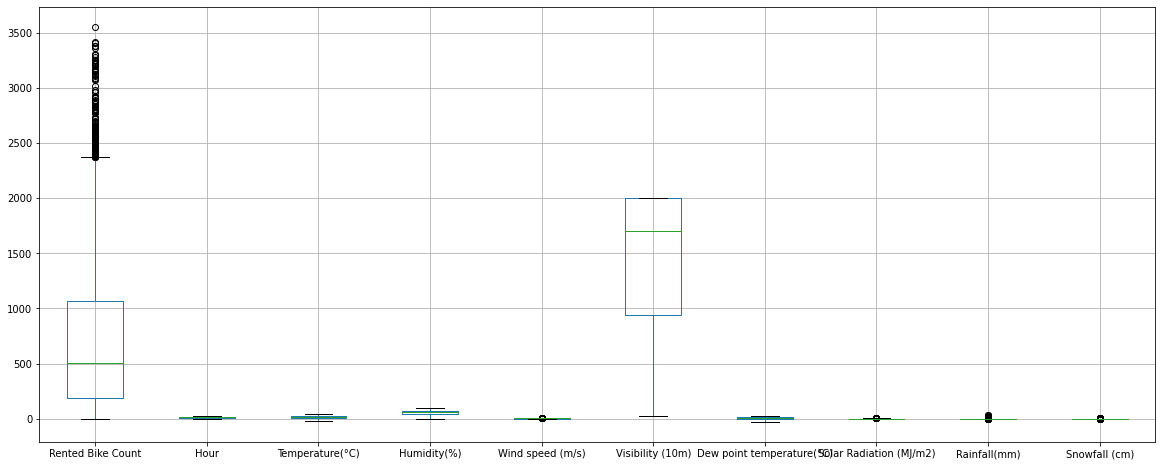

In [6]:
plt.figure(figsize=(20,8))
df.drop(columns=["Date", "Seasons", "Holiday", "Functioning Day"]).boxplot()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

**Verificando se há dados nulos:**

In [8]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Criando colunas apenas com mês e ano:**

In [9]:
df['mes'] = pd.DatetimeIndex(df["Date"]).month
df['ano'] = pd.DatetimeIndex(df["Date"]).year

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


#**Analisando estatísticamente o Target - Rented Bike Count**

### **Correlação:**

**Vemos abaixo nos dois gráficos que há correlações positivas altas e baixas e negativas de acordo com a correlação de Pearson.**

In [ ]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),mes,ano
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.036729e-15,2.336763e-14
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,3.777958e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,3.592468e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-3.780878e-03
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,5.238110e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,3.363497e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,1.280860e-01
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,2.752192e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-2.064178e-01


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),mes,ano
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,2017.915068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.278796
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,2017.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,2018.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,2018.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,2018.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,2018.000000


**Correlação de Spearman:**

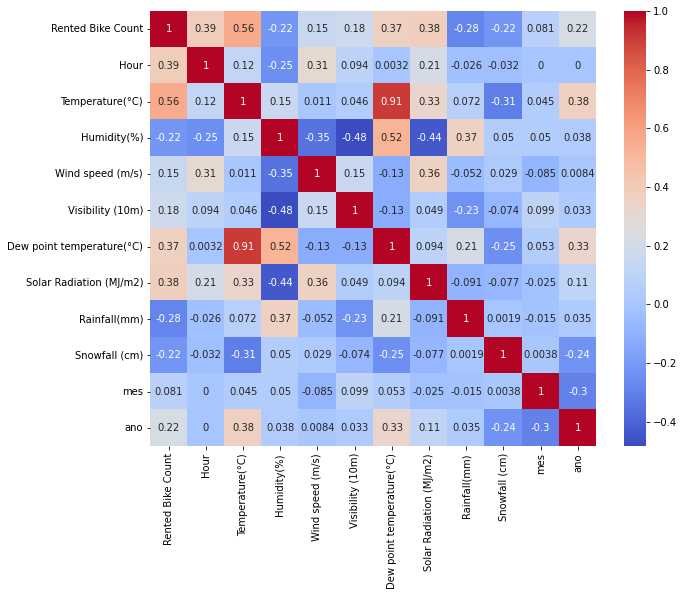

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr("spearman"), annot=True, cmap="coolwarm");

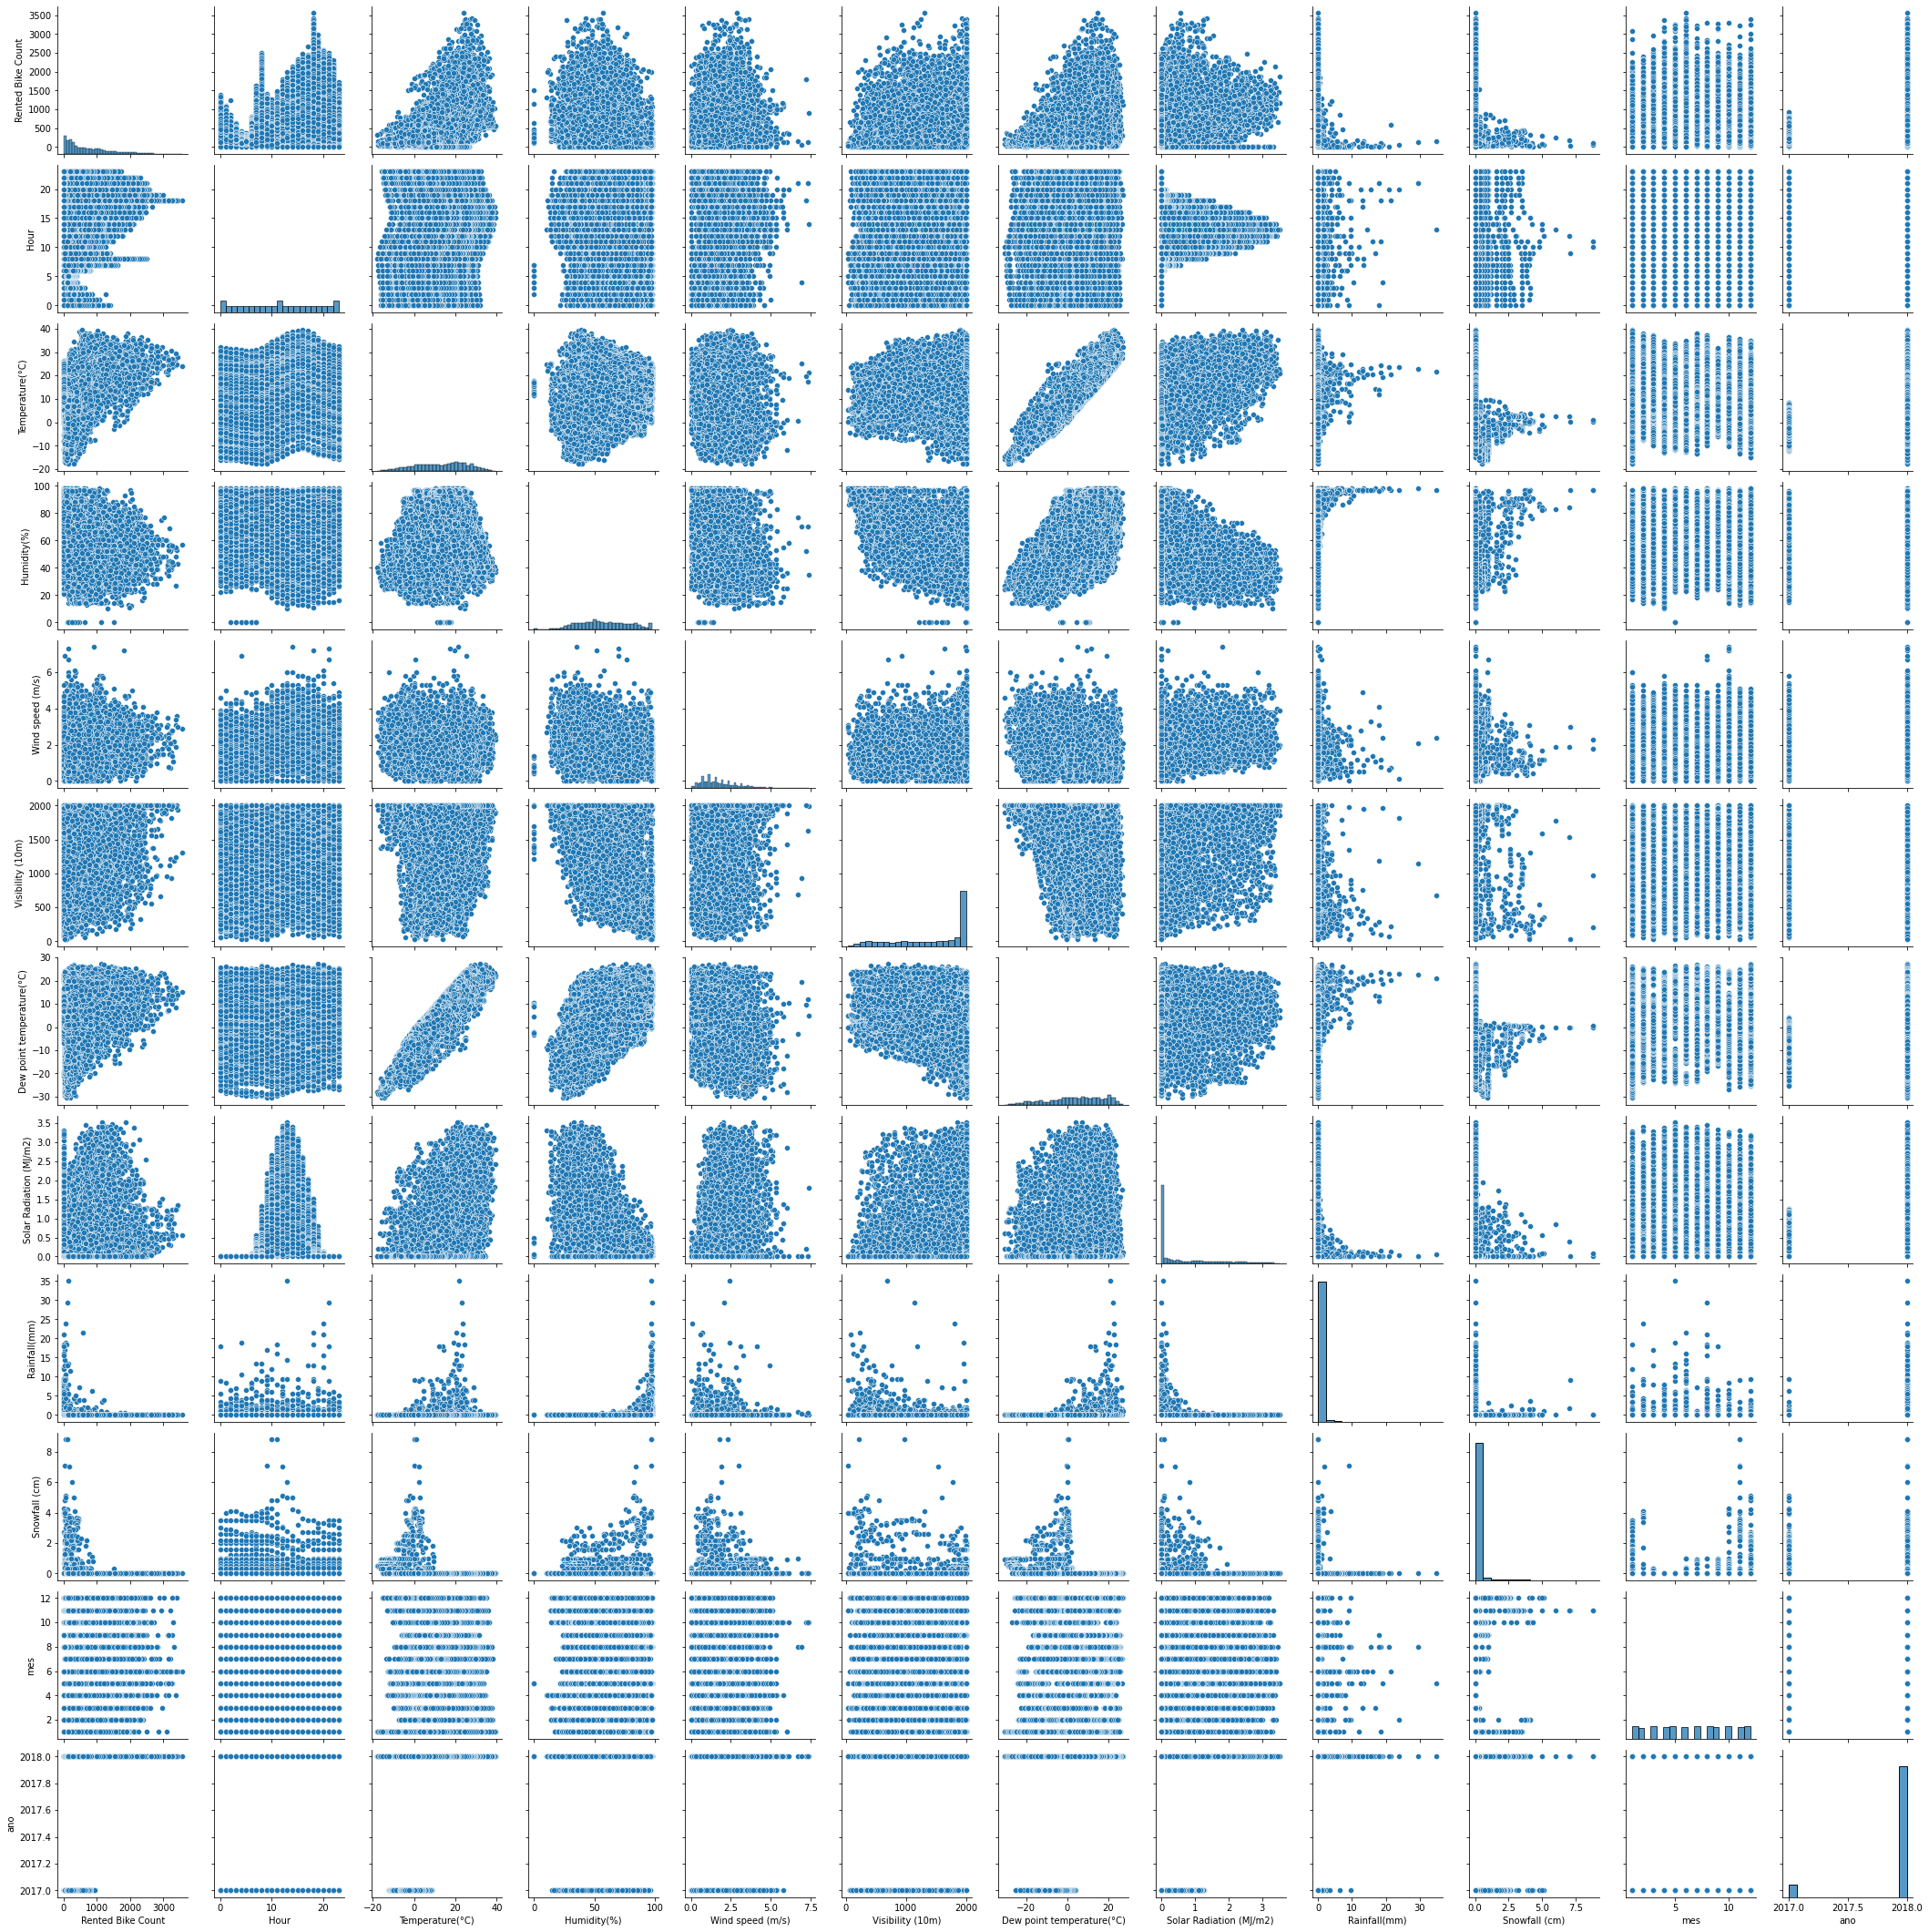

In [ ]:
sns.pairplot(df);

###**Intervalo de confiança - Média de aluguéis por hora**

**Nível de confiança = 95%**

Iremos pegar 1000 amostras aleatórias:

In [ ]:
import random
lista = []
for num in df["Rented Bike Count"]:
  lista.append(num)
dados = random.sample(lista,1000)

Média amostral:

In [ ]:
media = pd.DataFrame(dados).mean()
media = media[0]
media

680.951

Desvio padrão amostral:

In [ ]:
desvio_padrao = pd.DataFrame(dados).std()
desvio_padrao  = desvio_padrao[0]
desvio_padrao 

640.7613484790611

Número de amostras:

In [ ]:
n = len(dados)
n

1000

In [ ]:
from scipy.stats import norm
from scipy import stats
import math

In [ ]:
stats.sem(dados)

20.26265297794701

In [ ]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos

(641.2369299319906, 720.6650700680094)

In [ ]:
margem_erro = media - intervalos[0]
margem_erro

39.71407006800939

In [ ]:
print(f"Temos 95% de confiança que a média geral dos aluguéis de bike estará entre {intervalos[0]:.2f} e {intervalos[1]:.2f} bikes por hora com uma margem de erro de {margem_erro:.2f} para mais e para menos")

Temos 95% de confiança que a média geral dos aluguéis de bike estará entre 641.24 e 720.67 bikes por hora com uma margem de erro de 39.71 para mais e para menos


**De fato confirmamos abaixo que a média geral está dentro do intervalo:**

In [ ]:
df["Rented Bike Count"].mean()

704.6020547945205

### **Avaliando os quartis:**

In [ ]:

Q1 = df["Rented Bike Count"].quantile(q=0.25) # Primeiro quartil
Q2 = df["Rented Bike Count"].quantile(q=0.50) # Segundo quartil
Q3 = df["Rented Bike Count"].quantile(q=0.75) # Terceiro quartil

IQR = Q3 - Q1 # Intervalo interquartílico
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR
media = df["Rented Bike Count"].mean()
mediana = df["Rented Bike Count"].median()
moda = df["Rented Bike Count"].value_counts().index[0]

print(f"Primeiro quartil: {Q1}")
print(f"Segundo quartil: {Q2}")
print(f"Terceiro quartil: {Q3}")
print(f"Intervalo interquartílico: {IQR}")
print(f"Limite superior: {sup}")
print(f"Limite inferior: {inf}")
print(f"Média geral: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda-Valor mais frequente: {moda:.2f}")


Primeiro quartil: 191.0
Segundo quartil: 504.5
Terceiro quartil: 1065.25
Intervalo interquartílico: 874.25
Limite superior: 2376.625
Limite inferior: -1120.375
Média geral: 704.60
Mediana: 504.50
Moda-Valor mais frequente: 0.00


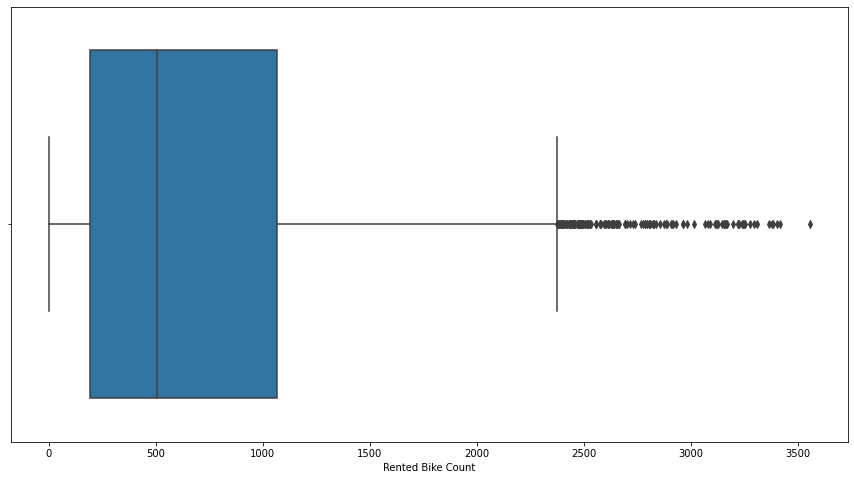

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df["Rented Bike Count"]);

### **Assimetria positiva |  moda <= mediana <= média**

Distribuição assimétrica à direita

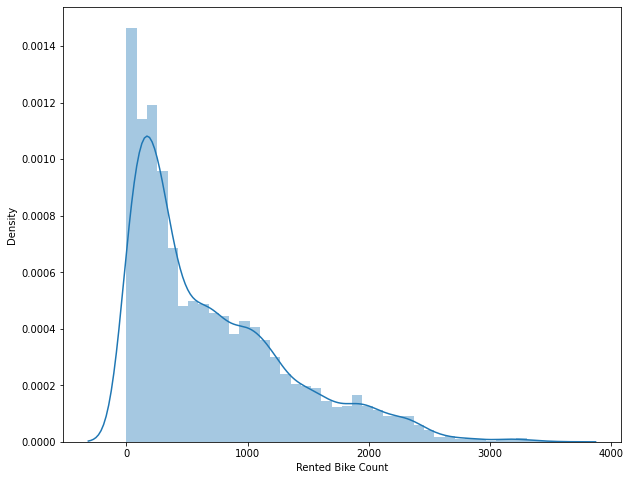

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df["Rented Bike Count"], );

### **Avaliando a medida de curtose:**

**Para valores acima de 0.263 => O resultado identificou como Platicúrtica.**

In [ ]:
Q10 = df["Rented Bike Count"].quantile(q=0.1) # Décimo quartil
Q90 = df["Rented Bike Count"].quantile(q=0.9) # Nonagésimo quartil
(Q3-Q1)/(2*(Q90-Q10))

0.27199614211934536

# **Variação do aluguel de Bicicletas X Hora do Dia X Estações Do Ano.**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


In [35]:
def grafico_estacao(estacao):
  lista_mes = []
  lista_media = []
  for i in sorted(df["Hour"].unique()):
    if i not in lista_mes:
      lista_mes.append(i)
      estacao_mes = df[df["Hour"] == i]
      media = estacao_mes[estacao_mes["Seasons"] == estacao]["Rented Bike Count"].mean()
      lista_media.append(media)

  return lista_media

In [36]:
date = sorted(df["Hour"].unique())

**Nota-se abaixo que os picos para aluguel estão próximos das 8h da manhã e 18h da noite, justamente os horários de saída das residências e trabalhos/escolas. Observamos também que a estação do ano (que é bem definida na Coréia do Sul) é um fator essencial para a quantidade de Bikes alugadas, temos um maior valor no verão e menor valor no inverno. Vamos fortalescer essa ideia no próximo gráfico onde mostramos o número de Bike alugadas x Temperatura**

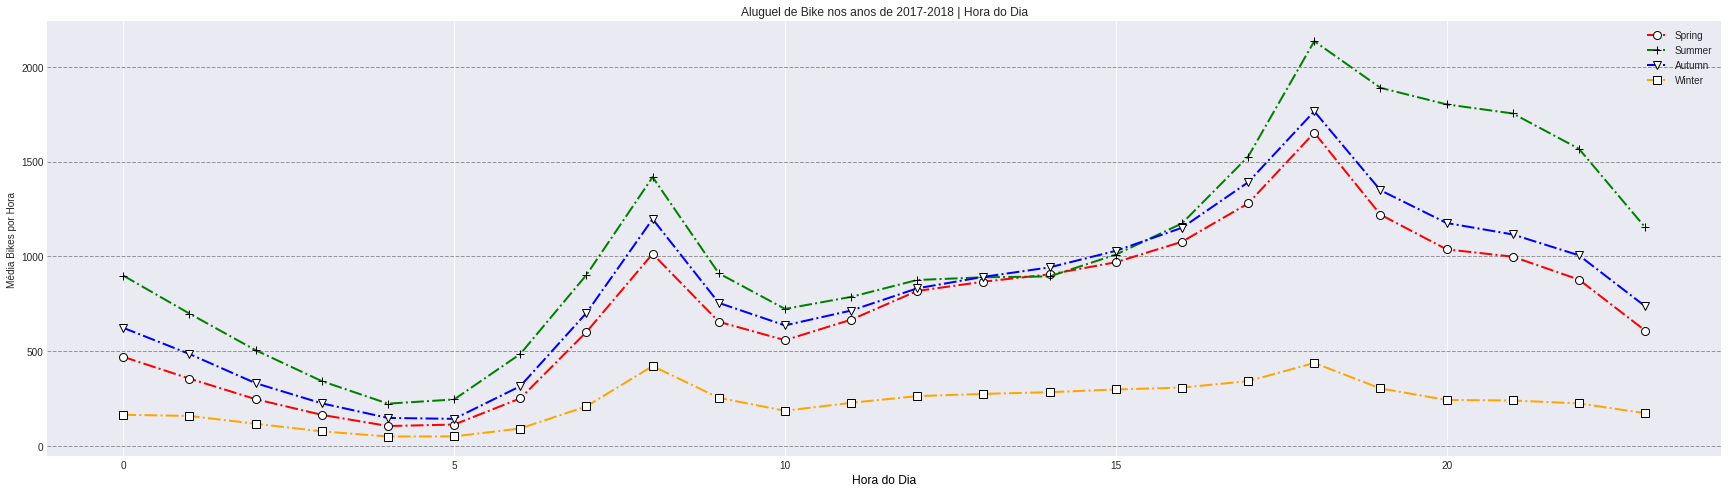

In [37]:
plt.figure(figsize=(30, 8))
plt.style.use("seaborn-darkgrid")
plt.plot(date, grafico_estacao("Spring"), color="red", marker="o", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2) 
plt.plot(date, grafico_estacao("Summer"),color="green", marker="+", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_estacao("Autumn"),color="blue", marker="v", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)
plt.plot(date, grafico_estacao("Winter"),color="orange", marker="s", ms=8, mec="k", markerfacecolor="w", ls="-.", lw=2)

# Rótulos
plt.title("Aluguel de Bike nos anos de 2017-2018 | Hora do Dia", loc="center")
plt.xlabel("Hora do Dia", color="black", size=12)
plt.ylabel("Média Bikes por Hora")
plt.legend(["Spring", "Summer", "Autumn", "Winter"])

#Gridlines
plt.grid(axis="y", color="gray", ls="--", lw="1", alpha=0.8)
plt.show()

# **Variação de Temperatura x Número de Bicicletas Alugadas**

Variação das temperaturas.

In [ ]:
df["Temperature(°C)"].value_counts()

 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64

Temperatura máxima e mínima.

In [ ]:
df["Temperature(°C)"].min(), df["Temperature(°C)"].max()

(-17.8, 39.4)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


In [39]:
df_rented_temp = df[["Rented Bike Count", "Temperature(°C)"]]
df_rented_temp = df_rented_temp.sort_values(by=["Temperature(°C)"], ascending=False)
df_rented_temp

,Rented Bike Count,Temperature(°C)
5848,561,39.4
5847,531,39.3
5849,1033,39.0
5846,475,38.7
5825,1184,38.0
...,...,...
1349,36,-16.9
1350,64,-17.4
1351,142,-17.5
1353,149,-17.5


Como os valores de Temperatura tem uma casa decimal temos 8.760 valores diferentes para gerar o gráfico, vamos ter que agrupar em classes de 5 em 5 graus gerar algum resultado visivel.

In [40]:
temp_class = pd.cut(x=df_rented_temp["Temperature(°C)"], bins=[-20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
df_rented_temp["Temperaturas-Classes"] = temp_class
df_rented_temp

,Rented Bike Count,Temperature(°C),Temperaturas-Classes
5848,561,39.4,"(35, 40]"
5847,531,39.3,"(35, 40]"
5849,1033,39.0,"(35, 40]"
5846,475,38.7,"(35, 40]"
5825,1184,38.0,"(35, 40]"
...,...,...,...
1349,36,-16.9,"(-20, -15]"
1350,64,-17.4,"(-20, -15]"
1351,142,-17.5,"(-20, -15]"
1353,149,-17.5,"(-20, -15]"


Vemos uma correlação positiva entre a Temperatura e número de Bicicletas alugadas

Temos um aumento de 1.200% no aluguel de Bicicletas entre a pior (Inverno) e melhor estação de aluguel (Verão).

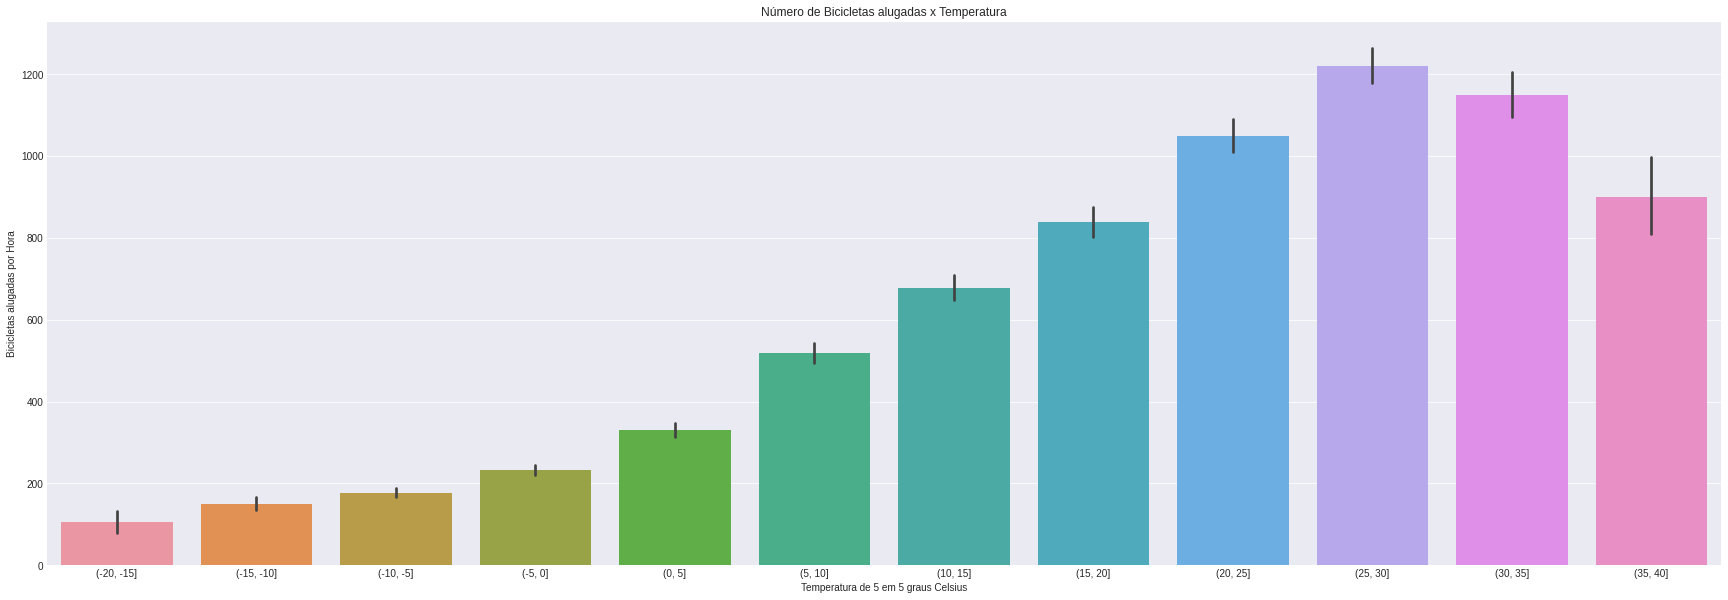

In [42]:
plt.figure(figsize=(30, 10))
plt.style.use("seaborn-darkgrid")
sns.barplot(data=df_rented_temp, x="Temperaturas-Classes", y="Rented Bike Count")
plt.title("Número de Bicicletas alugadas x Temperatura")
plt.xlabel("Temperatura de 5 em 5 graus Celsius")
plt.ylabel("Bicicletas alugadas por Hora");

# **Quantidade de Chuva x Bikes Alugadas**

93% dos dias em que houve aluguéis foram feitos em dias sem chuva, sobre as exceções, no caso de dias chuvosos, ocorreram muitos aluguéis, porém foram alugéis pontuais a determinados horários como veremos adiante.

In [32]:
df["Rainfall(mm)"].value_counts(normalize=True)

0.0     0.939726
0.5     0.013242
1.0     0.007534
1.5     0.006393
0.1     0.005251
          ...   
1.9     0.000114
3.3     0.000114
17.0    0.000114
1.4     0.000114
1.8     0.000114
Name: Rainfall(mm), Length: 61, dtype: float64

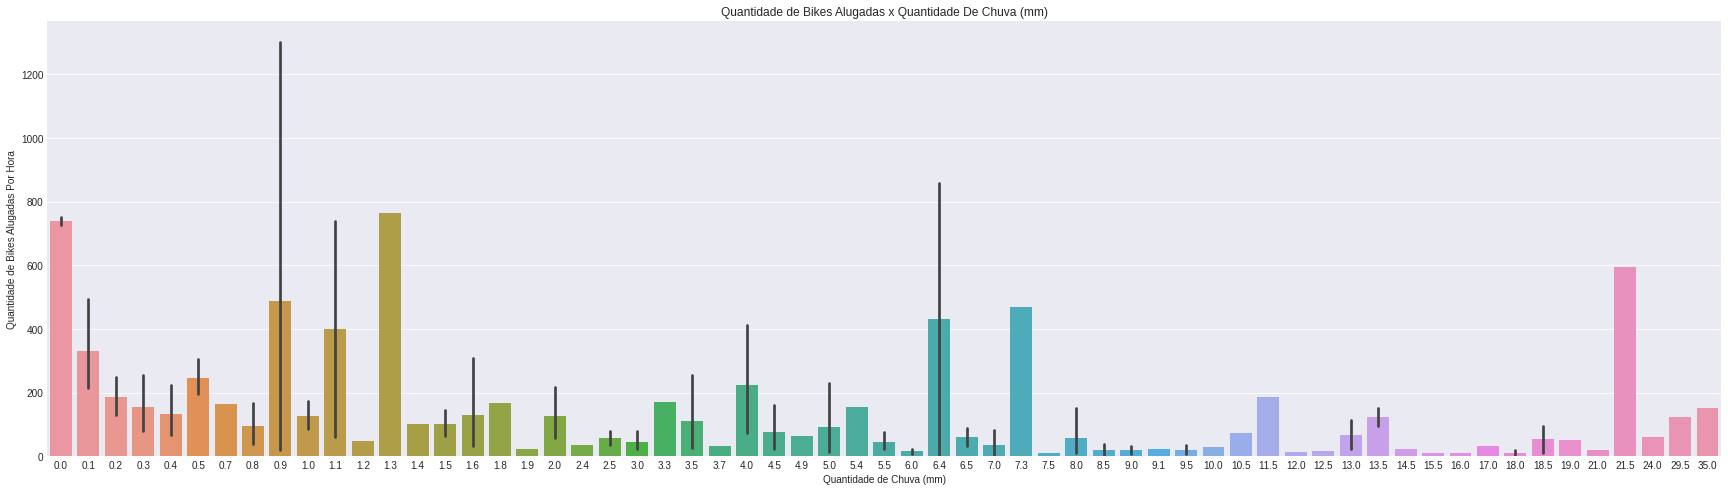

In [43]:
plt.figure(figsize=(30,8))
plt.style.use("seaborn-darkgrid")
sns.barplot(data=df,y="Rented Bike Count", x="Rainfall(mm)")
plt.title("Quantidade de Bikes Alugadas x Quantidade De Chuva (mm)")
plt.xlabel("Quantidade de Chuva (mm)")
plt.ylabel("Quantidade de Bikes Alugadas Por Hora");

Vimos acima que no dia em que choveu 21.5mm (O 4º maior volume registrado) houve uma quantidade enorme de aluguéis por Hora, vamos verificar os dados deste registro:

In [ ]:
df_rain = df[df["Rainfall(mm)"]==21.5]
df_rain

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
5034,2018-06-28,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes,6,2018


O volume máximo registrado nestes 2 anos foi de 35.0 mm, para a meteorologia é considerado um valor mediano, então a chuva não influencia em nada o aluguel de Bikes na cidade. 

Notamos na tabela abaixo que os horários que foram registrados maiores chuvas neste intervalo de tempo foram horas que eles consideram de "diversão", dias úteis, mas horas em que não trabalhavam, observamos também que a maior parte foi no Verão.

In [ ]:
df_rain_hum = df[["Hour", "Humidity(%)", "Rainfall(mm)", "Seasons", "Holiday", "Functioning Day"]].sort_values(by="Rainfall(mm)", ascending=False)
df_rain_hum.head(20)

,Hour,Humidity(%),Rainfall(mm),Seasons,Holiday,Functioning Day
3997,13,97,35.0,Spring,No Holiday,Yes
6501,21,98,29.5,Summer,No Holiday,Yes
5132,20,97,24.0,Summer,No Holiday,Yes
5034,18,97,21.5,Summer,No Holiday,Yes
6524,20,98,21.0,Summer,No Holiday,Yes
4012,4,98,19.0,Spring,No Holiday,Yes
6498,18,97,18.5,Summer,No Holiday,Yes
5099,11,97,18.5,Summer,No Holiday,Yes
8232,0,96,18.0,Autumn,No Holiday,No
8229,21,96,18.0,Autumn,No Holiday,Yes


# **Quantidade de Bikes Alugadas x Feriado**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


In [44]:
df_rain_holiday = df[["Rented Bike Count", "Holiday", "Hour"]].sort_values(by="Rented Bike Count", ascending=False)
df_rain_holiday.head(20)

,Rented Bike Count,Holiday,Hour
4818,3556,No Holiday,18
4866,3418,No Holiday,18
4650,3404,No Holiday,18
4842,3384,No Holiday,18
4458,3380,No Holiday,18
4890,3365,No Holiday,18
4554,3309,No Holiday,18
6810,3298,No Holiday,18
6978,3277,No Holiday,18
6858,3256,No Holiday,18


**Notamos abaixo as quantidades de Bikes alugadas em dias úteis é muito maior do que nos feriados, como vimos na tabela acima, alugam mais na saída do trabalho, às 18 horas. A excelente cultura Sul Coreana de ir ao trabalho/escola/faculdade de Bicicleta.**

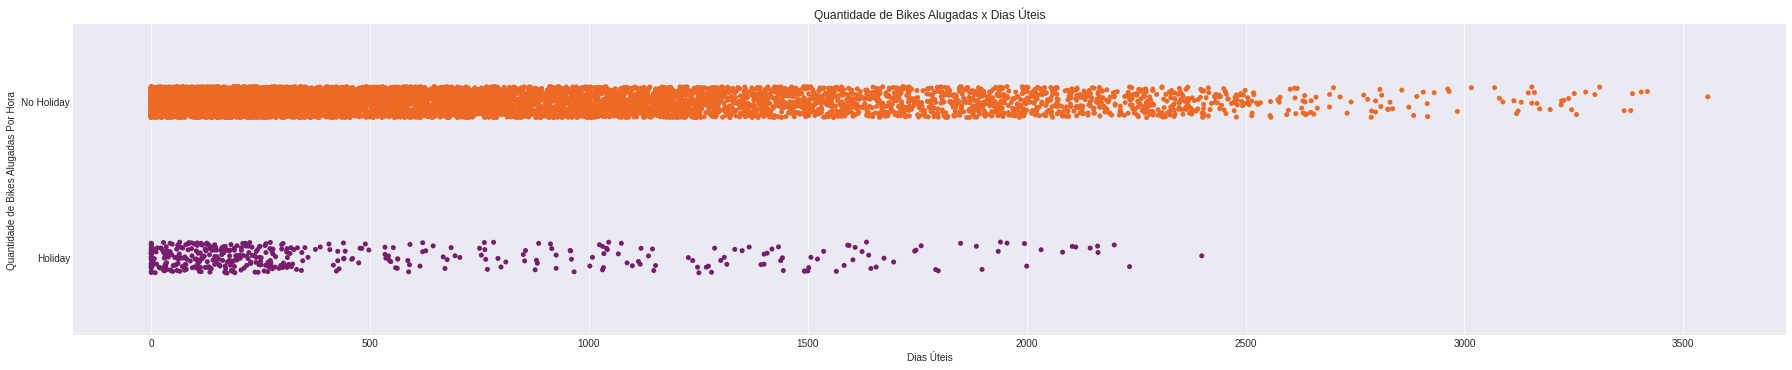

In [45]:
plt.style.use("seaborn-darkgrid")
sns.catplot(data=df_rain_holiday, y="Holiday", x="Rented Bike Count", height=5, aspect=5, palette="inferno_r")
plt.title("Quantidade de Bikes Alugadas x Dias Úteis")
plt.xlabel("Dias Úteis")
plt.ylabel("Quantidade de Bikes Alugadas Por Hora");

Como vemos abaixo, 95% dos aluguéis são feitos em dias úteis

In [29]:
df["Holiday"].value_counts(normalize=True)

No Holiday    0.950685
Holiday       0.049315
Name: Holiday, dtype: float64

Observamos abaixo que nas primeiras horas do dia a variação Feriado/Não Feriado é menor quando se trata do aluguel, exceto às 8h da manhã (que em dia últil é a hora em que todos vão ao trabalho), diferentemente das últimas horas do dia em que ocorre uma variação enorme Feriado/Não Feriado.

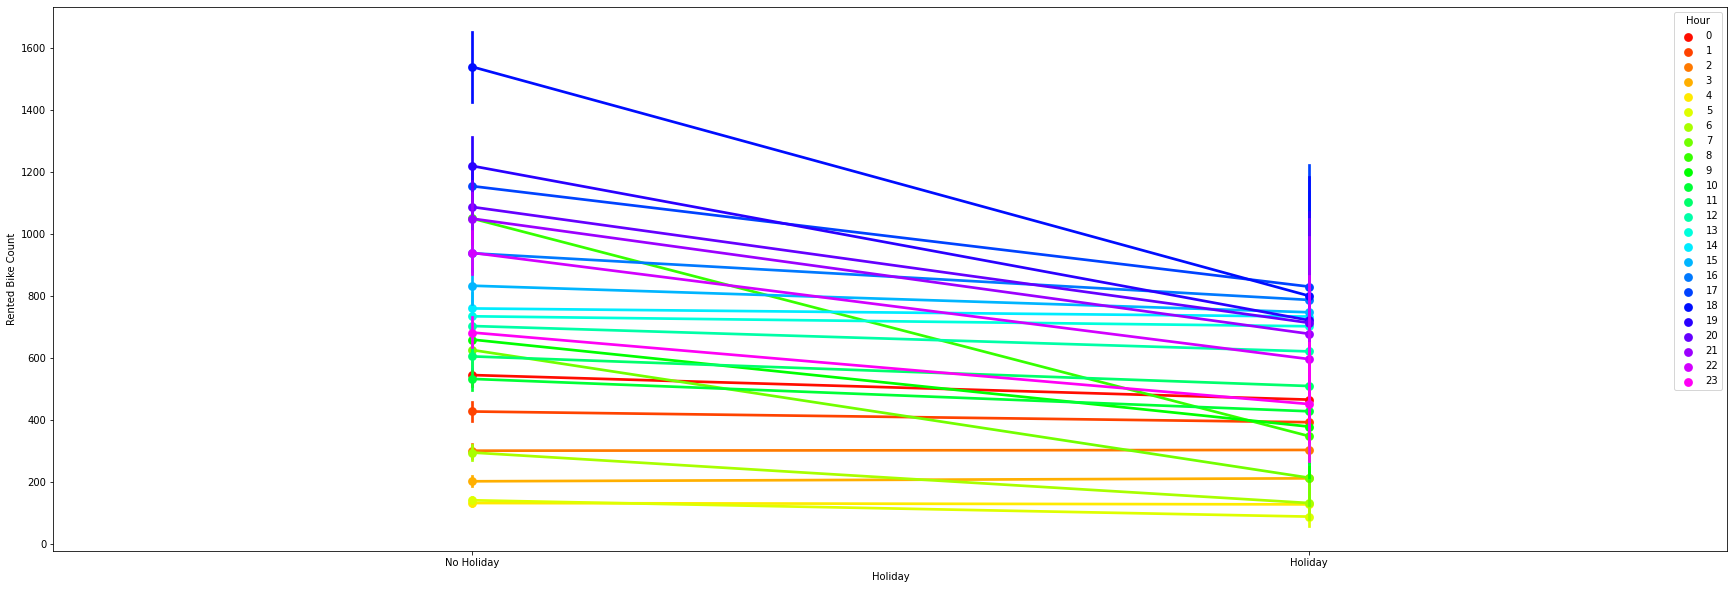

In [ ]:
plt.figure(figsize=(30,10))
sns.pointplot(data=df_rain_holiday, y="Rented Bike Count", x="Holiday", hue="Hour", palette="gist_rainbow");

# **Hora do Aluguel x Velocidade do Vento**

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


Podemos ver que a velocidade do vento não é intimidadora para aluguel de Bicicletas, nas horas em que há o pico de aluguel, em torno das 18h como vimos acima, são as horas em que há uma maior velocidade do vento.

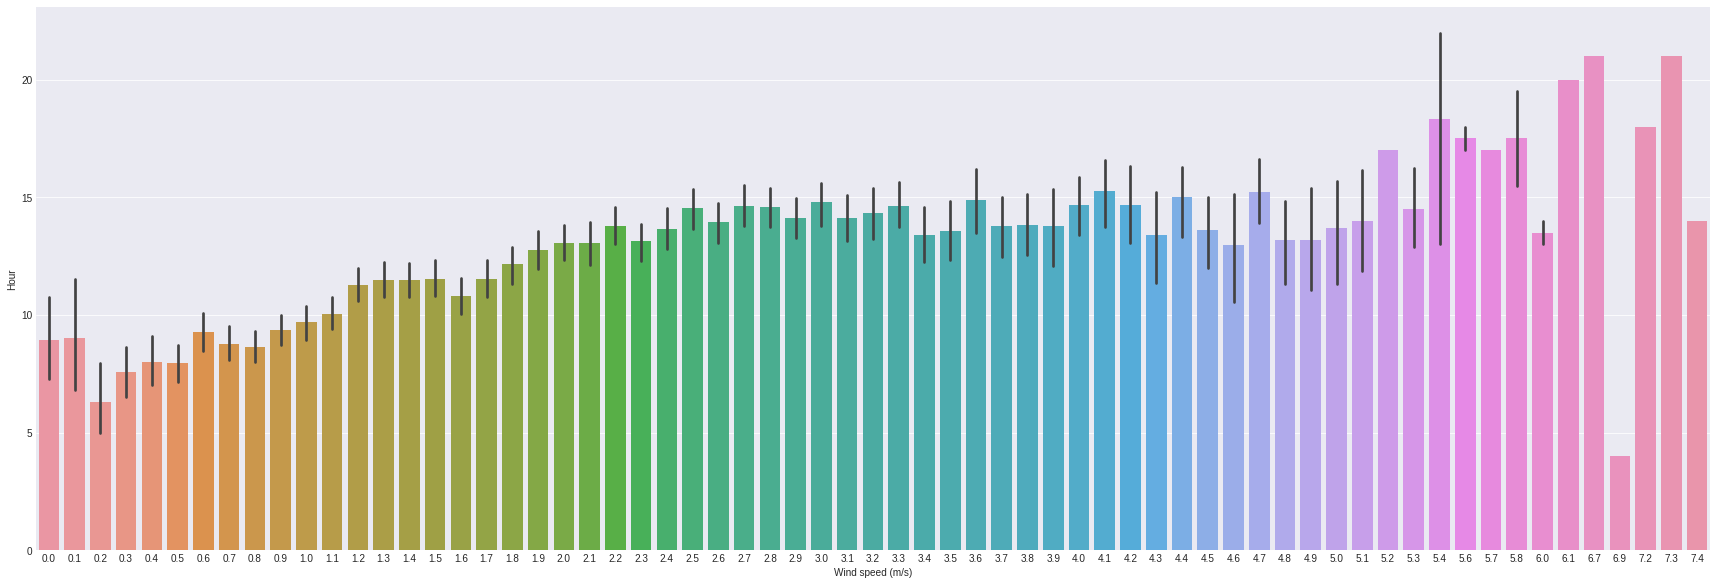

In [46]:
plt.figure(figsize=(30,10))
plt.style.use("seaborn-darkgrid")
sns.barplot(data=df, x="Wind speed (m/s)", y="Hour");